# Demoluación de AM por sampleo

Se pretende mostrar el teorema de Nyquist para demodular (traer la información a banda base).



Text(0.5,1,'AM [time]')

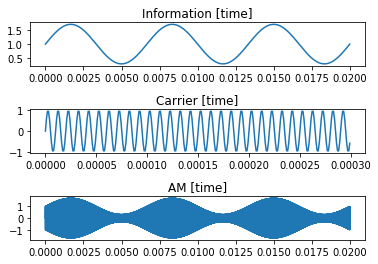

In [37]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft, fftshift
from __future__ import division

Fs = 150 # Frecuencia de modulante
Fc = 1e5 # Frecuencia de carrier
Ss = 10  # Sobre sampleo Fs = Ss * Fc
Fs1 = Ss*Fc
N = 20000 # Numero total de muestras por cada señal
M = 0.7  # Indice de modulación

t = np.arange(0, N/Fs1, 1/Fs1) #base de tiempo

x = M*np.sin(2*np.pi*Fs*t)+1 # Modulante 'x'
c = np.sin(2*np.pi*Fc*t) # Carrier 'c'

am = x*c

gs1 = plt.GridSpec(3,1)
gs1.update(hspace=1)
ax1_gs1 = plt.subplot(gs1[0])
ax1_gs1.plot(t, x)
ax1_gs1.set_title('Information [time]')
ax2_gs1 = plt.subplot(gs1[1])
ax2_gs1.plot(t[0:300], c[0:300])
ax2_gs1.set_title('Carrier [time]')
ax3_gs1 = plt.subplot(gs1[2])
ax3_gs1.plot(t, am)
ax3_gs1.set_title('AM [time]')

Text(0.5,1,'AM - BLU [freq]')

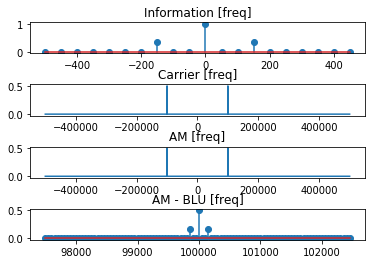

In [38]:
f = np.arange(-Fs1/2, Fs1/2, Fs1/N)
spec_x = fftshift(abs(fft(x)))/N
spec_c = fftshift(abs(fft(c)))/N
spec_am = fftshift(abs(fft(am)))/N

gs2 = plt.GridSpec(4,1)
gs2.update(hspace=1)

ax1_gs2 = plt.subplot(gs2[0])
ax1_gs2.stem(f[int(N/2)-10:int(N/2)+10],spec_x[int(N/2)-10:int(N/2)+10])
ax1_gs2.set_title('Information [freq]')

ax2_gs2 = plt.subplot(gs2[1])
ax2_gs2.plot(f,spec_c)
ax2_gs2.set_title('Carrier [freq]')

ax3_gs2 = plt.subplot(gs2[2])
ax3_gs2.plot(f,spec_am)
ax3_gs2.set_title('AM [freq]')

ax4_gs2 = plt.subplot(gs2[3])
ax4_gs2.stem(f[int(N/2)+1950 : int(N/2) + 2050],spec_am[int(N/2)+1950 : int(N/2) + 2050])
ax4_gs2.set_title('AM - BLU [freq]')

Text(0.5,1,'Information reconstructed [freq]')

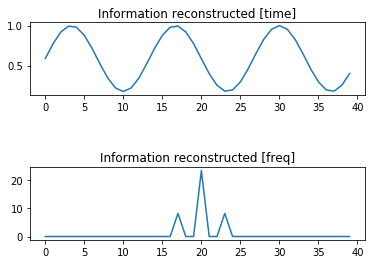

In [41]:
ts = np.arange(1,N,(Fc/200), dtype=int)
sam = np.copy(am[ts])

spec_sam = fftshift(abs(fft(sam)))


gs3 = plt.GridSpec(2,1)
gs3.update(hspace=1)
ax1_gs3 = plt.subplot(gs3[0])
ax1_gs3.plot(sam)
ax1_gs3.set_title('Information reconstructed [time]')
ax2_gs3 = plt.subplot(gs3[1])
ax2_gs3.plot(spec_sam)
ax2_gs3.set_title('Information reconstructed [freq]')